In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
#import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [4]:
data_2018 = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2018')
#data_2018 = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2018')
data_2018 = data_2018.loc[data_2018["Crime Name1"] != "Not a Crime"]
data_2018 = data_2018.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, data_2018["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data_2018["Start Time"] = ugh
ugh = (list(map(str,data_2018['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data_2018['Start Date'] = ugh

In [5]:
z_20902 = data.loc[data["Zip Code"] == 20902]
z_20906 = data.loc[data["Zip Code"] == 20906]
z_20904 = data.loc[data["Zip Code"] == 20904]
z_20910 = data.loc[data["Zip Code"] == 20910]
z_20874 = data.loc[data["Zip Code"] == 20874]
z_20902_2018 = data_2018.loc[data_2018["Zip Code"] == 20902]
z_20906_2018 = data_2018.loc[data_2018["Zip Code"] == 20906]
z_20904_2018 = data_2018.loc[data_2018["Zip Code"] == 20904]
z_20910_2018 = data_2018.loc[data_2018["Zip Code"] == 20910]
z_20874_2018 = data_2018.loc[data_2018["Zip Code"] == 20874]

In [6]:
from dateutil import rrule, parser
def daycount(data):
    start_date = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    if (len(start_date)!=365):
        start_date.append("04-23")
    start_date.sort()
    ugh = [0 for i in range(0,len(start_date))]
    for index,row in data.iterrows():
        a = start_date.index(row["Start Date"])
        ugh[a] += 1.0
    start_date = list(rrule.rrule(rrule.DAILY,
                         dtstart=parser.parse("2017-01-01"),
                         until=parser.parse("2017-12-31")))
    for i in range (0,len(start_date)):
        start_date[i] =start_date[i].date()
    march = pd.DataFrame({"Crime Count": ugh, "Date":start_date} )
    #ax = march.plot(kind = "line", y = "Crime Count", figsize = (40,10), title = ("2017" +str(title)), xticks = [0,31,59,90,120,151,181,212,243,273,304,334,365], grid = True)
    #fig = ax.get_figure()
    #fig.savefig("2017" + title + ".png")
    return march

In [7]:
def daycount_2018(data):
    start_date = ['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14', '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21', '01-22', '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23', '02-24', '02-25', '02-26', '02-27', '02-28', '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19', '03-20', '03-21', '03-22', '03-23', '03-24', '03-25', '03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01', '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12', '04-13', '04-14', '04-15', '04-16', '04-17', '04-18', '04-19', '04-20', '04-21', '04-22', '04-23', '04-24', '04-25', '04-26', '04-27', '04-28', '04-29', '04-30', '05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10', '05-11', '05-12', '05-13', '05-14', '05-15', '05-16', '05-17', '05-18', '05-19', '05-20', '05-21', '05-22', '05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29', '05-30', '05-31', '06-01', '06-02', '06-03', '06-04', '06-05', '06-06', '06-07', '06-08', '06-09', '06-10', '06-11', '06-12', '06-13', '06-14', '06-15', '06-16', '06-17', '06-18', '06-19', '06-20']
    ugh = [0 for i in range(0,len(start_date))]
    for index,row in data.iterrows():
        a = start_date.index(row["Start Date"])
        ugh[a] += 1.0
    start_date = list(rrule.rrule(rrule.DAILY,
                         dtstart=parser.parse("2018-01-01"),
                         until=parser.parse("2018-06-20")))
    for i in range (0,len(start_date)):
        start_date[i] =start_date[i].date()
    march = pd.DataFrame({"Crime Count": ugh, "Date":start_date} )
    #ax = march.plot(kind = "line", y = "Crime Count", figsize = (40,10), title = ("2017" +str(title)), xticks = [0,31,59,90,120,151,181,212,243,273,304,334,365], grid = True)
    #fig = ax.get_figure()
    #fig.savefig("2017" + title + ".png")
    return march

In [8]:
day_20902 = daycount(z_20902)
day_20906 = daycount(z_20906)
day_20904 = daycount(z_20904)
day_20910 = daycount(z_20910)
day_20874 = daycount(z_20874)
day_20902_2018 = daycount_2018(z_20902_2018)
day_20906_2018 = daycount_2018(z_20906_2018)
day_20904_2018 = daycount_2018(z_20904_2018)
day_20910_2018 = daycount_2018(z_20910_2018)
day_20874_2018 = daycount_2018(z_20874_2018)

Observations: 365
Training Observations: 240
Testing Observations: 125


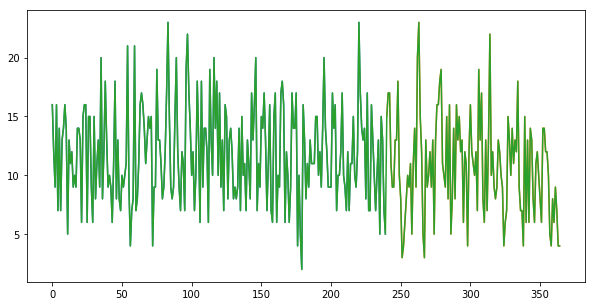

In [9]:
from pandas import Series
#series = day_20902
X = day_20902["Crime Count"]
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
plt.figure(figsize = (10,5))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.plot(list(day_20902["Crime Count"]))
plt.show()

Observations: 536
Training Observations: 365
Testing Observations: 171


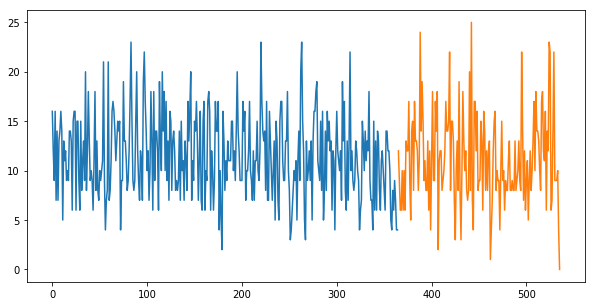

In [10]:
from pandas import Series
#series = day_20902
train, test = day_20902["Crime Count"], day_20902_2018["Crime Count"]
print('Observations: %d' % (len(day_20902.index) + len(day_20902_2018.index)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
plt.figure(figsize = (10,5))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
#plt.plot(list(day_20902["Crime Count"]) + list(day_20902_2018["Crime Count"]))
plt.show()

Observations: 15
Training Observations: 8
Testing Observations: 7


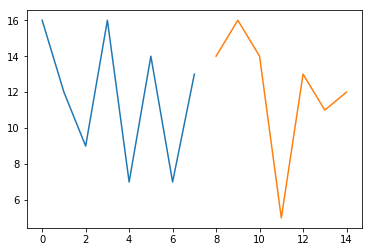

Observations: 22
Training Observations: 15
Testing Observations: 7


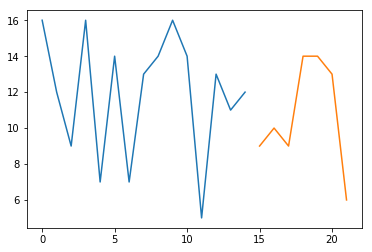

Observations: 29
Training Observations: 22
Testing Observations: 7


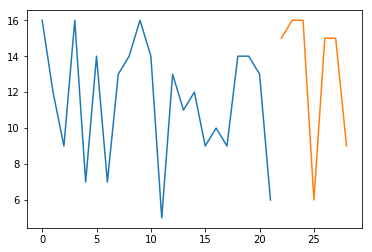

Observations: 36
Training Observations: 29
Testing Observations: 7


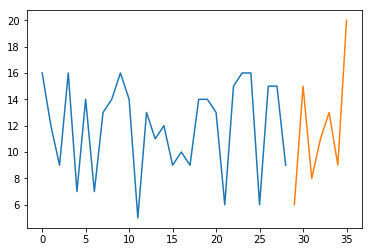

Observations: 43
Training Observations: 36
Testing Observations: 7


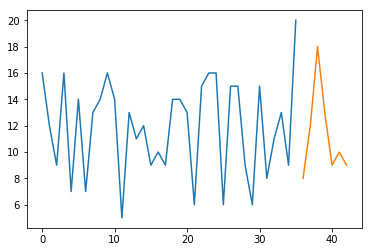

Observations: 50
Training Observations: 43
Testing Observations: 7


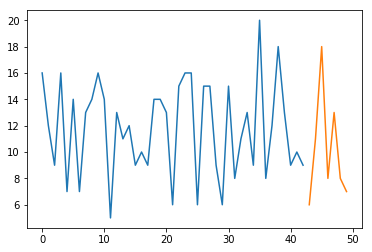

Observations: 57
Training Observations: 50
Testing Observations: 7


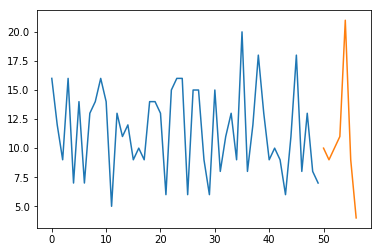

Observations: 64
Training Observations: 57
Testing Observations: 7


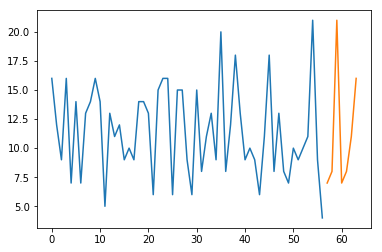

Observations: 71
Training Observations: 64
Testing Observations: 7


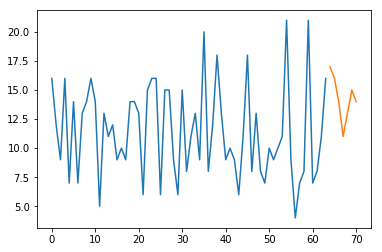

Observations: 78
Training Observations: 71
Testing Observations: 7


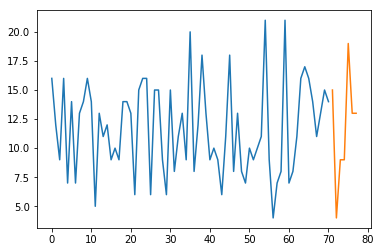

Observations: 85
Training Observations: 78
Testing Observations: 7


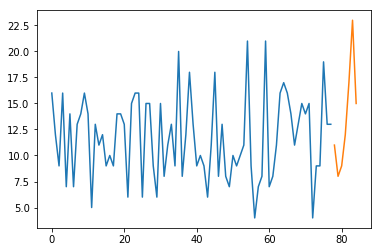

Observations: 92
Training Observations: 85
Testing Observations: 7


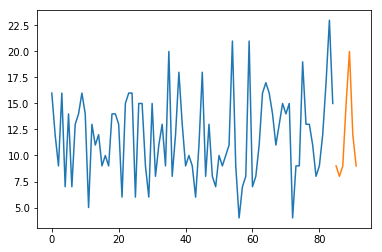

Observations: 99
Training Observations: 92
Testing Observations: 7


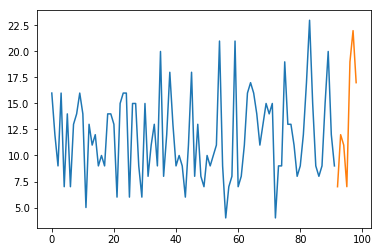

Observations: 106
Training Observations: 99
Testing Observations: 7


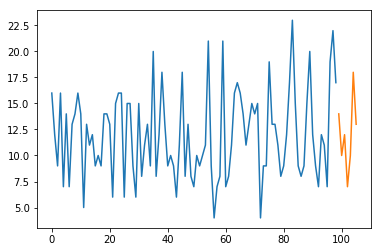

Observations: 113
Training Observations: 106
Testing Observations: 7


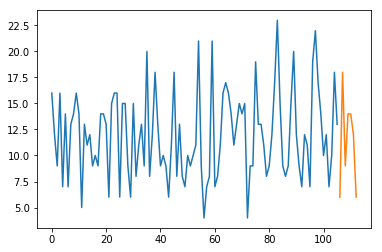

Observations: 120
Training Observations: 113
Testing Observations: 7


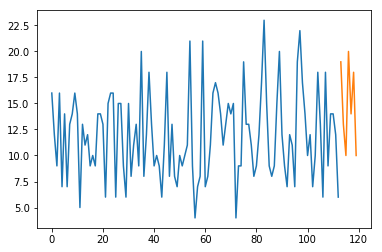

Observations: 127
Training Observations: 120
Testing Observations: 7


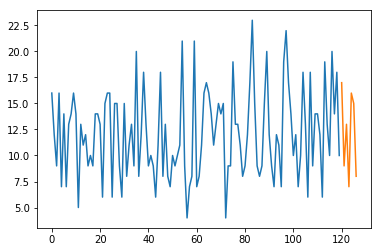

Observations: 134
Training Observations: 127
Testing Observations: 7


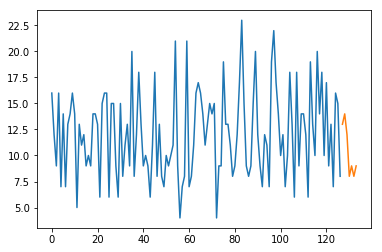

Observations: 141
Training Observations: 134
Testing Observations: 7


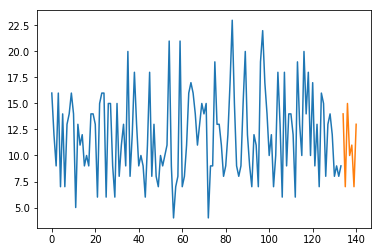

Observations: 148
Training Observations: 141
Testing Observations: 7


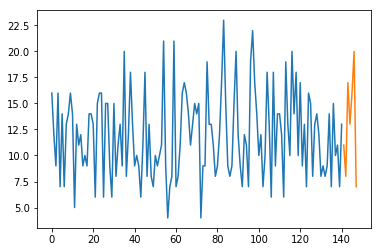

Observations: 155
Training Observations: 148
Testing Observations: 7


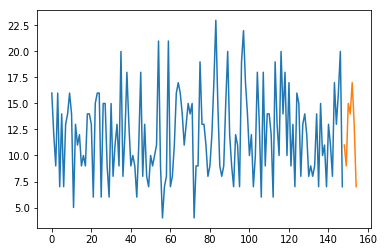

Observations: 162
Training Observations: 155
Testing Observations: 7


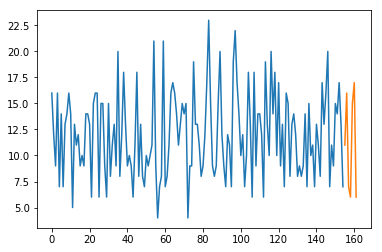

Observations: 169
Training Observations: 162
Testing Observations: 7


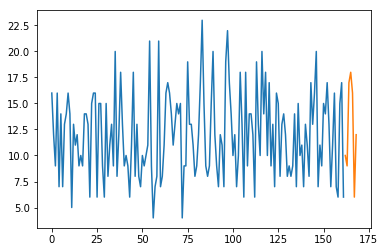

Observations: 176
Training Observations: 169
Testing Observations: 7


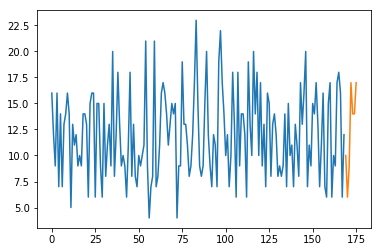

Observations: 183
Training Observations: 176
Testing Observations: 7


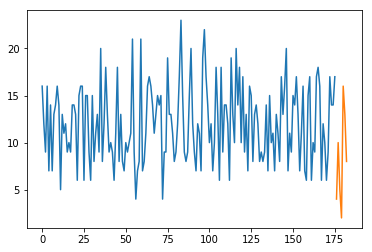

Observations: 190
Training Observations: 183
Testing Observations: 7


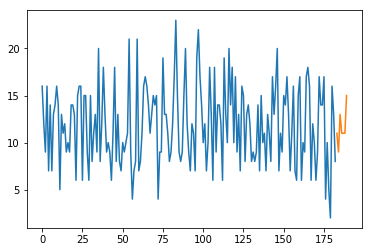

Observations: 197
Training Observations: 190
Testing Observations: 7


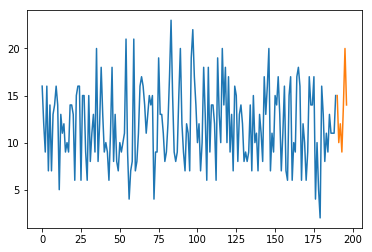

Observations: 204
Training Observations: 197
Testing Observations: 7


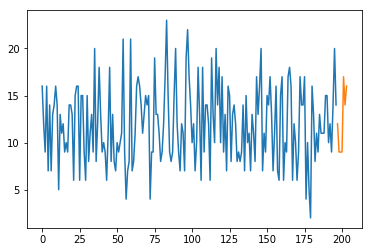

Observations: 211
Training Observations: 204
Testing Observations: 7


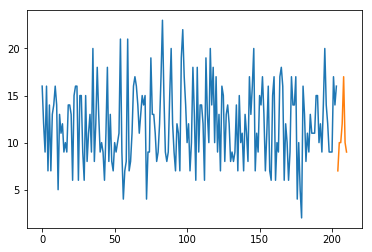

Observations: 218
Training Observations: 211
Testing Observations: 7


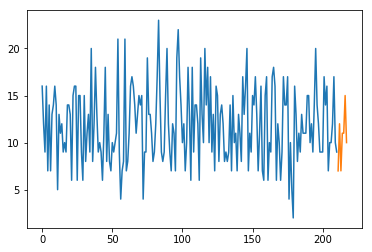

Observations: 225
Training Observations: 218
Testing Observations: 7


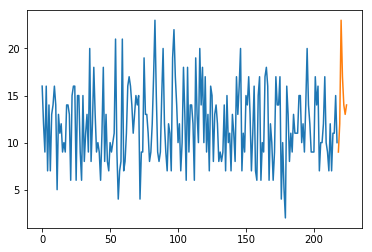

Observations: 232
Training Observations: 225
Testing Observations: 7


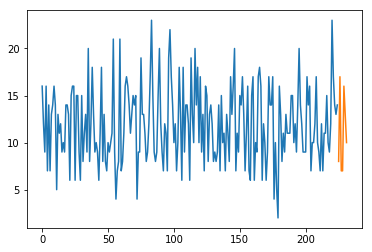

Observations: 239
Training Observations: 232
Testing Observations: 7


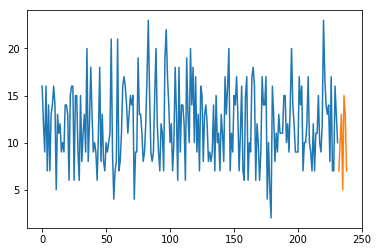

Observations: 246
Training Observations: 239
Testing Observations: 7


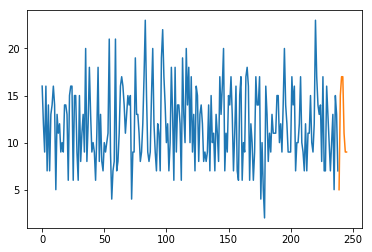

Observations: 253
Training Observations: 246
Testing Observations: 7


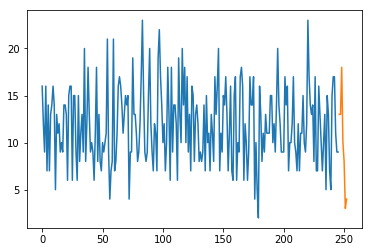

Observations: 260
Training Observations: 253
Testing Observations: 7


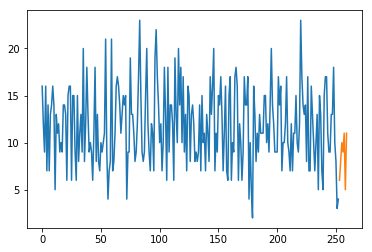

Observations: 267
Training Observations: 260
Testing Observations: 7


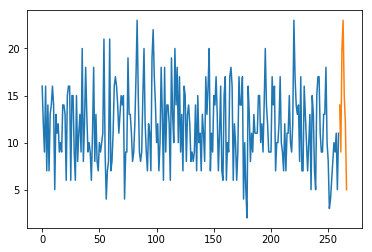

Observations: 274
Training Observations: 267
Testing Observations: 7


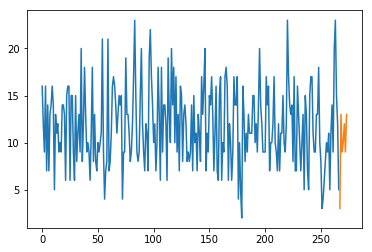

Observations: 281
Training Observations: 274
Testing Observations: 7


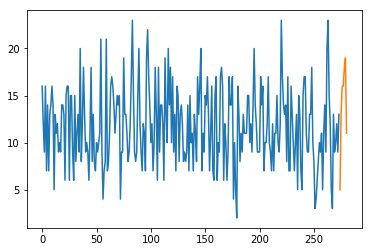

Observations: 288
Training Observations: 281
Testing Observations: 7


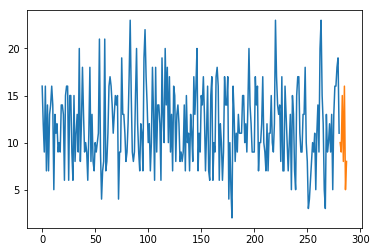

Observations: 295
Training Observations: 288
Testing Observations: 7


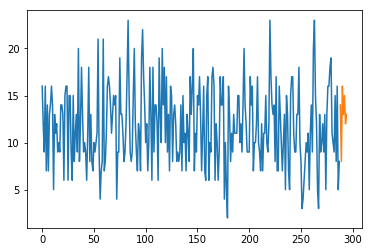

Observations: 302
Training Observations: 295
Testing Observations: 7


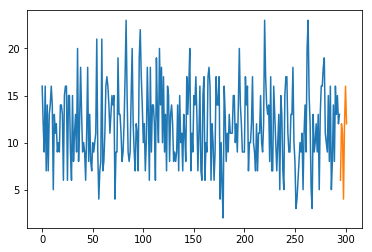

Observations: 309
Training Observations: 302
Testing Observations: 7


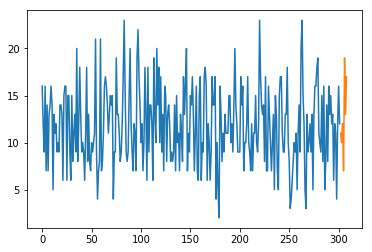

Observations: 316
Training Observations: 309
Testing Observations: 7


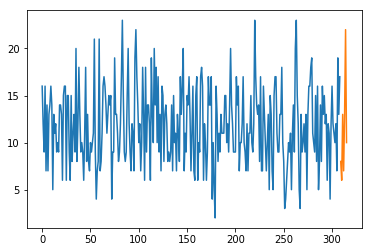

Observations: 323
Training Observations: 316
Testing Observations: 7


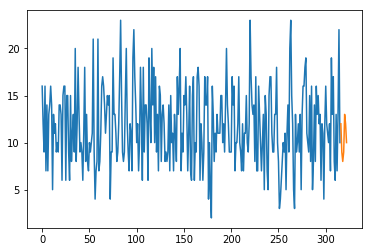

Observations: 330
Training Observations: 323
Testing Observations: 7


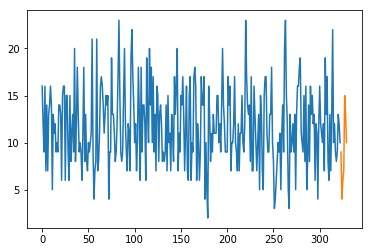

Observations: 337
Training Observations: 330
Testing Observations: 7


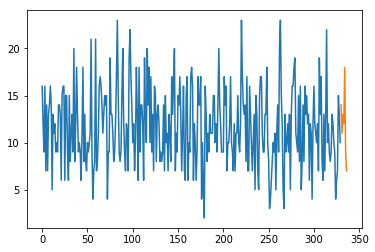

Observations: 344
Training Observations: 337
Testing Observations: 7


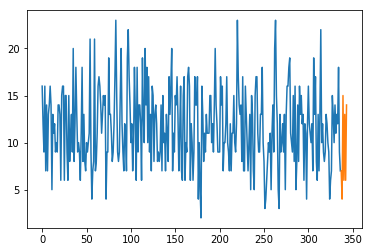

Observations: 351
Training Observations: 344
Testing Observations: 7


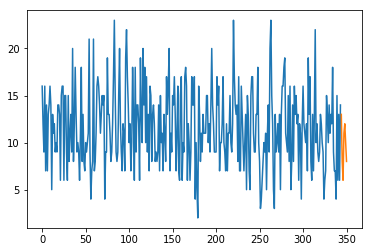

Observations: 358
Training Observations: 351
Testing Observations: 7


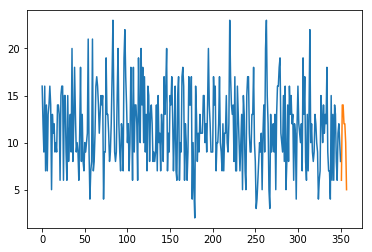

Observations: 365
Training Observations: 358
Testing Observations: 7


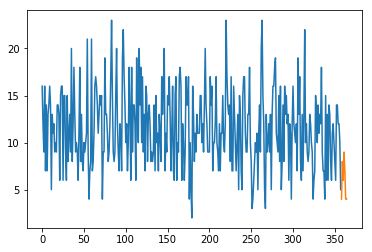

In [12]:
from pandas import Series
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
X = day_20902["Crime Count"]
splits = TimeSeriesSplit(n_splits=51)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    pyplot.show()

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
print(cross_validate(svc,X, cv = splits,scoring=('r2', 'mean_squared_error')))


ValueError: Found input variables with inconsistent numbers of samples: [1, 365]

In [16]:
zipcode = [day_20906,day_20904,day_20910,day_20874,day_20902]
zipcode_2018 = [day_20906_2018,day_20904_2018,day_20910_2018,day_20874_2018,day_20902_2018]
zipcode_name = [20906,20904,20910,20874,20902]
for i in range (0,5):
    #day_20902_2018.plot()
    print(zipcode_name[i])
    mod = AR(zipcode[i]["Crime Count"])
    print(mod.select_order(ic = "aic",maxlag = 7))
    res = mod.fit(ic = 'aic',maxlag = 7)
    #res.plot_predict(start=365, end=535)
    #plt.show()
    #print(res.summary())
    y = res.predict(start=365, end=535).tolist()
    y_hat = zipcode_2018[i]["Crime Count"].tolist()
    resid = []
    for r in range (0,len(y_hat)):
        resid.append((y_hat[r] - y[r]) * (y_hat[r] - y[r]))
    print("MSE:",np.mean(resid))
    svc = SVC()
    #plt.figure(figsize=(10,5))
    #plt.plot(y_hat)
    #plt.plot(y)
    #plt.show()

20906
7
MSE: 12.401407258520974


ValueError: Found input variables with inconsistent numbers of samples: [365, 171]

20906
7
MSE: 12.401407258520976
20904
1
MSE: 17.540601329487693
20910
1
MSE: 21.307992941106182
20874
7
MSE: 16.908680395074875
20902
1
MSE: 20.816689838049157

In [42]:
zipcode = [day_20906,day_20904,day_20910,day_20874,day_20902]
zipcode_2018 = [day_20906_2018,day_20904_2018,day_20910_2018,day_20874_2018,day_20902_2018]
zipcode_name = [20906,20904,20910,20874,20902]
zipcode_order = [(7,7),(4,4),(4,4),(3,3),(5,4)]
for i in range (0,5):
    #day_20902_2018.plot()
    print(zipcode_name[i])
    mod = ARMA(zipcode[i]["Crime Count"],order = zipcode_order[i])
    print("(p,q):", zipcode_order[i])
    res = mod.fit()
    print("2018")
    y = res.predict(start=365, end=535).tolist()
    y_hat = zipcode_2018[i]["Crime Count"].tolist()
    resid = []
    for r in range (0,len(y_hat)):
        resid.append((y_hat[r] - y[r]) * (y_hat[r] - y[r]))
    print("MSE:",np.mean(resid))
    #plt.figure(figsize=(10,5))
    #plt.plot(y_hat)
    #plt.plot(y)
    #plt.show()
    
    print("2017")
    y_2017 = res.predict(start=0, end=365).tolist()
    y_hat_2017 = zipcode[i]["Crime Count"].tolist()
    resid_2017 = []
    for r in range (0,len(y_hat_2017)):
        resid_2017.append((y_hat_2017[r] - y_2017[r]) * (y_hat_2017[r] - y_2017[r]))
    print("MSE:",np.mean(resid_2017))    
    print()
    #plt.figure(figsize=(10,5))
    #plt.plot(y_hat_2017)
    #plt.plot(y_2017)
    #plt.show()

20906
(p,q): (7, 7)


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2018
MSE: 12.269654279677876
2017
MSE: 10.84733131465459

20904
(p,q): (4, 4)


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2018
MSE: 17.494428894296437
2017
MSE: 12.9255576311256

20910
(p,q): (4, 4)
2018
MSE: 22.356365757651478
2017
MSE: 21.81634299338396

20874
(p,q): (3, 3)
2018
MSE: 17.16652529616319
2017
MSE: 13.365355595063075

20902
(p,q): (5, 4)
2018
MSE: 20.56271076138992
2017
MSE: 15.325649124236252



    ugh = []
    ughh = []
    for p in range (0,8):
        for q in range(0,8):
            try:
                mod = ARMA(zipcode[i]["Crime Count"],order = (p,q))
                res = mod.fit()
                #print(p,q)
                #print(res.aic)
                ugh.append((p,q))
                ughh.append(res.aic)
            except:
                continue
20906
(p,q): (7, 7)
AIC: 1937.5631607906917
2018
MSE: 12.269654279677876
2017
MSE: 10.84733131465459

20904
(p,q): (4, 4)
AIC: 1990.6758267523574
2018
MSE: 17.494428894296437
2017
MSE: 12.9255576311256

20910
(p,q): (4, 4)
AIC: 2181.4262537259756
2018
MSE: 22.356365757651478
2017
MSE: 21.81634299338396

20874
(p,q): (3, 3)
AIC: 1998.2222023860309
2018
MSE: 17.16652529616319
2017
MSE: 13.365355595063075
    
20902
(p,q): (5, 4)
AIC: 2054.2187837960632
2018
MSE: 20.56271076138992
2017
MSE: 15.325649124236252

[(7,7),(4,4),(4,4),(3,3),(5,4)]

In [ ]:
zipcode = [day_20906,day_20904,day_20910,day_20874,day_20902]
zipcode_2018 = [day_20906_2018,day_20904_2018,day_20910_2018,day_20874_2018,day_20902_2018]
zipcode_name = [20906,20904,20910,20874,20902]
zipcode_order = [(7,0,7),(4,0,4),(4,0,4),(3,0,3),(5,0,4)]
for i in range (0,5):
    #day_20902_2018.plot()
    print(zipcode_name[i])
    mod = ARIMA(zipcode[i]["Crime Count"],order = zipcode_order[i])
    print("(p,q):", zipcode_order[i])
    res = mod.fit()
    print("2018")
    y = res.predict(start=365, end=535).tolist()
    y_hat = zipcode_2018[i]["Crime Count"].tolist()
    resid = []
    for r in range (0,len(y_hat)):
        resid.append((y_hat[r] - y[r]) * (y_hat[r] - y[r]))
    print("MSE:",np.mean(resid))
    #plt.figure(figsize=(10,5))
    #plt.plot(y_hat)
    #plt.plot(y)
    #plt.show()

zip_order = [(7,0,7),(4,0,4),(4,0,4),(3,0,3),(5,1,6)]
20906
(p,q): (7, 0, 7)
2018
MSE: 12.269654279677876
2017
MSE: 10.84733131465459
    
20904
(p,q): (4, 0, 4)
2018
MSE: 17.494428894296437
2017
MSE: 12.9255576311256

20910
(p,q): (4, 0, 4)
2018
MSE: 22.356365757651478
2017
MSE: 21.81634299338396

20874
(p,q): (3, 0, 3)
2018
MSE: 17.16652529616319
2017
MSE: 13.365355595063075

20902
(p,q): (5, 1, 6)
2018
MSE: 145.0114257311892
2017

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
zipcode = [day_20906,day_20904,day_20910,day_20874,day_20902]
zipcode_2018 = [day_20906_2018,day_20904_2018,day_20910_2018,day_20874_2018,day_20902_2018]
zipcode_name = [20906,20904,20910,20874,20902]
for i in range (0,5):
    #day_20902_2018.plot()
    print(zipcode_name[i])
    ugh = []
    ughh = []
    ughhh = []
    for p in range (1,8):
        for d in range (0,8):
            for q in range (0,8):
                for P in range (0,8):
                    for D in range (0,8):
                        for Q in range (0,8):
                            mod = SARIMAX(zipcode[i]["Crime Count"],order=(p,d,q), seasonal_order=(p,d,q,52))
                            res = mod.fit()
                            ugh.append((p,d,q))
                            ughh.append((P,D,Q,52))
                            ughhh.append(res.aic)
    mod = ARIMA(zipcode[i]["Crime Count"],order = ugh[ughhh.index(min(ughhhh))], seasonal_order = ugh[ughhh.index(min(ughhh))])
    print("(p,d,q):",ugh[ughhh.index(min(ughhhh))])
    print("(P,D,Q,52):",ughh[ughhh.index(min(ughhhh))])
    res = mod.fit()
    print("2018")
    y = res.predict(start=365, end=535).tolist()
    y_hat = zipcode_2018[i]["Crime Count"].tolist()
    resid = []
    for r in range (0,len(y_hat)):
        resid.append((y_hat[r] - y[r]) * (y_hat[r] - y[r]))
    print("MSE:",np.mean(resid))
    #plt.figure(figsize=(10,5))
    #plt.plot(y_hat)
    #plt.plot(y)
    #plt.show()

20906


In [ ]:
#10-fold cross validation on zip vs gray_scale
#save resideuals on each test
#and save models from each test